In [ ]:
import pandas as pd
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn import metrics 
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

#Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [22]:
heart_df = pd.read_csv('heart.csv')
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
#2.feladat: Cseréld ki a Sex oszlop értékeit 0-ra és 1-re!

In [ ]:
heart_df['Sex'] = heart_df['Sex'].replace(['F'], 0)
heart_df['Sex'] = heart_df['Sex'].replace(['M'], 1)
heart_df["Sex"] = heart_df["Sex"].astype("int64")

heart_df.head(6)

In [ ]:
#3. feladat: Nézd meg hogy az egyes oszlopokban milyen típusú adatok vannak!
# Válaszd ki azokat az oszlopokat, amik számmal jellemezhetőek, készíts egy új dataframet ezek alapján és plotold ezek korrelációját!

In [ ]:
print(heart_df.dtypes)

In [19]:
num_heart_df = pd.DataFrame(heart_df, columns=['Age','Sex','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease'])
num_heart_df.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,1,140,289,0,172,0.0,0
1,49,0,160,180,0,156,1.0,1
2,37,1,130,283,0,98,0.0,0
3,48,0,138,214,0,108,1.5,1
4,54,1,150,195,0,122,0.0,0


In [ ]:
#4. feladat: Készíts egy hisztogrammot a 'age' oszlop alapján!

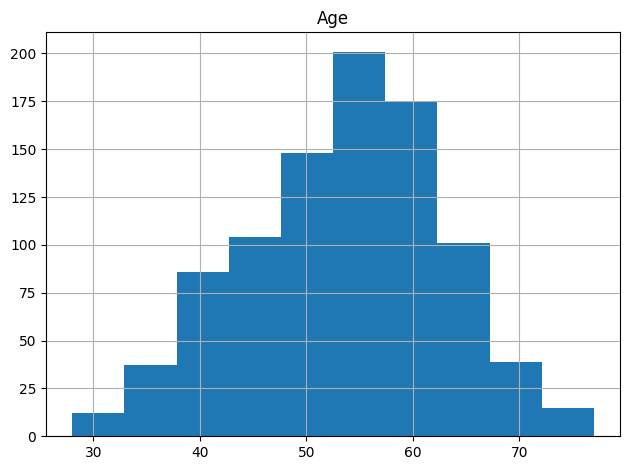

In [18]:
num_heart_df.hist(column='Age')
plt.tight_layout()

In [ ]:
#5.feladat: Készíts egy oszlop diagrammot amely bemutatja a nemek eloszlását!

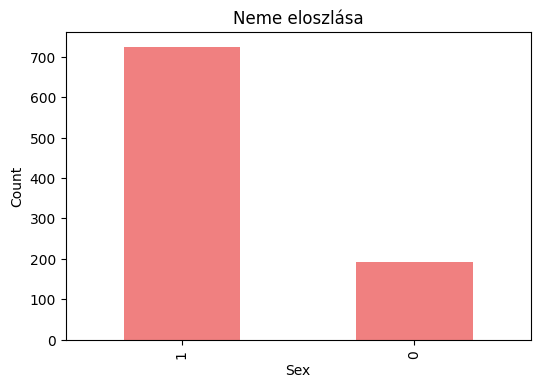

In [36]:
plt.figure(figsize=(6, 4))
num_heart_df['Sex'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Neme eloszlása')
plt.show()

In [ ]:
#6. feladat: Készíts egy 'box' plotot amely megmutaja hogy a ChestPainType-okhoz milyen MaxHR eloszlás tartozik!

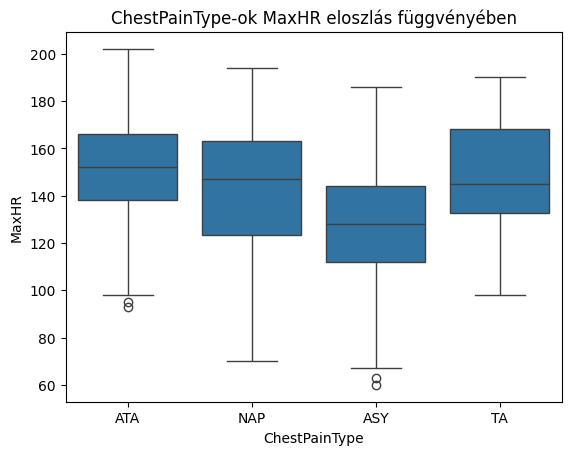

In [37]:
sns.boxplot(x='ChestPainType', y='MaxHR', data=heart_df)
plt.title('ChestPainType-ok MaxHR eloszlás függvényében')
plt.xlabel('ChestPainType')
plt.ylabel('MaxHR')
plt.show()

In [ ]:
#7. feladat: Néhány mondatban foglald össze, hogy milyen következtetéseket vonhatunk le az adatokból az eddigi vizualizációk alapján!
#(ha szükséges akkor készíts újabb vizualizációkat, amik szerinted hasznosak lehetnek) 

In [ ]:
#     Hogy könnyen értelmezhető pl., hogy milyen mellkasi fájdalmak fordulnak elő nagyobb eséllyel adott szívveréseknél vagy 
#ha szívrohamról beszélünk, jóval nagyobb eséllyel az áldozat férfi lesz; mi az a korosztály ahol nagyobb eséllyel bekövvetkezhet.
#az egyszerű ember számára egyszerű képet ad úgy, hogy hozzá nem kell tudnia analizálnia a nyers adatokat

In [ ]:
#8. feldata: Készíts egy X és egy y változót, amelyek a tanító adatokat és a HeartDisease oszlopot tartalmazzák!
#Figyelj rá, hogy csak azokat az oszlopokat válaszd ki, amelyek számmal jellemezhetőek!

In [38]:
X = num_heart_df.drop('HeartDisease', axis=1)
Y = num_heart_df['HeartDisease']

In [39]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,1,140,289,0,172,0.0
1,49,0,160,180,0,156,1.0
2,37,1,130,283,0,98,0.0
3,48,0,138,214,0,108,1.5
4,54,1,150,195,0,122,0.0
...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1.2
914,68,1,144,193,1,141,3.4
915,57,1,130,131,0,115,1.2
916,57,0,130,236,0,174,0.0


In [40]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
#9. feladat: Spliteld az adatokat train és test adatokra! (70-30 arányban)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

In [ ]:
#10. feladat: Taníts fel egy DecisionTreeClassifier-t a train adatokon!

In [42]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
#11. feladat: Printeld ki milyen pontosságot értél el a modell segítségével!

In [44]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7210144927536232


In [ ]:
#12. feladat: Taníts fel egy RandomForestClassifier-t a train adatokon, Randomized Search segítségével!
#paraméterek: 
param_dist = {'n_estimators': np.random.randint(50,500), 'max_depth': np.random.randint(1,20)}
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [54]:
rf = RandomForestClassifier()
param_dist = {
    'n_estimators': np.random.randint(50, 500, size=10),  # Például 10 véletlenszerű érték az intervallumból
    'max_depth': np.random.randint(1, 20, size=10)  # Például 10 véletlenszerű érték az intervallumból
}
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=32
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': array([14, 18,  6, 14, 10, 15, 15, 13, 16,  5]),
                                        'n_estimators': array([418, 354, 322, 106, 296, 131, 359, 440, 130, 458])},
                   random_state=32)

In [ ]:
#13. feladat: Printeld ki a legjobb paramétereket! (n_estimators, max_depth)

In [55]:
print("Legjobb paraméterek:", random_search.best_params_)

Legjobb paraméterek: {'n_estimators': 322, 'max_depth': 6}


In [ ]:
#14.feladat: Prediktálj a teszt adatokra és printeld ki az accuracy-t!

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7789855072463768


In [ ]:
#15. feladat: Készíts egy confusion matrixot a predikciók alapján!

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
#16. feladat: Vizualizáld a Random Forest modell első döntési fáját!

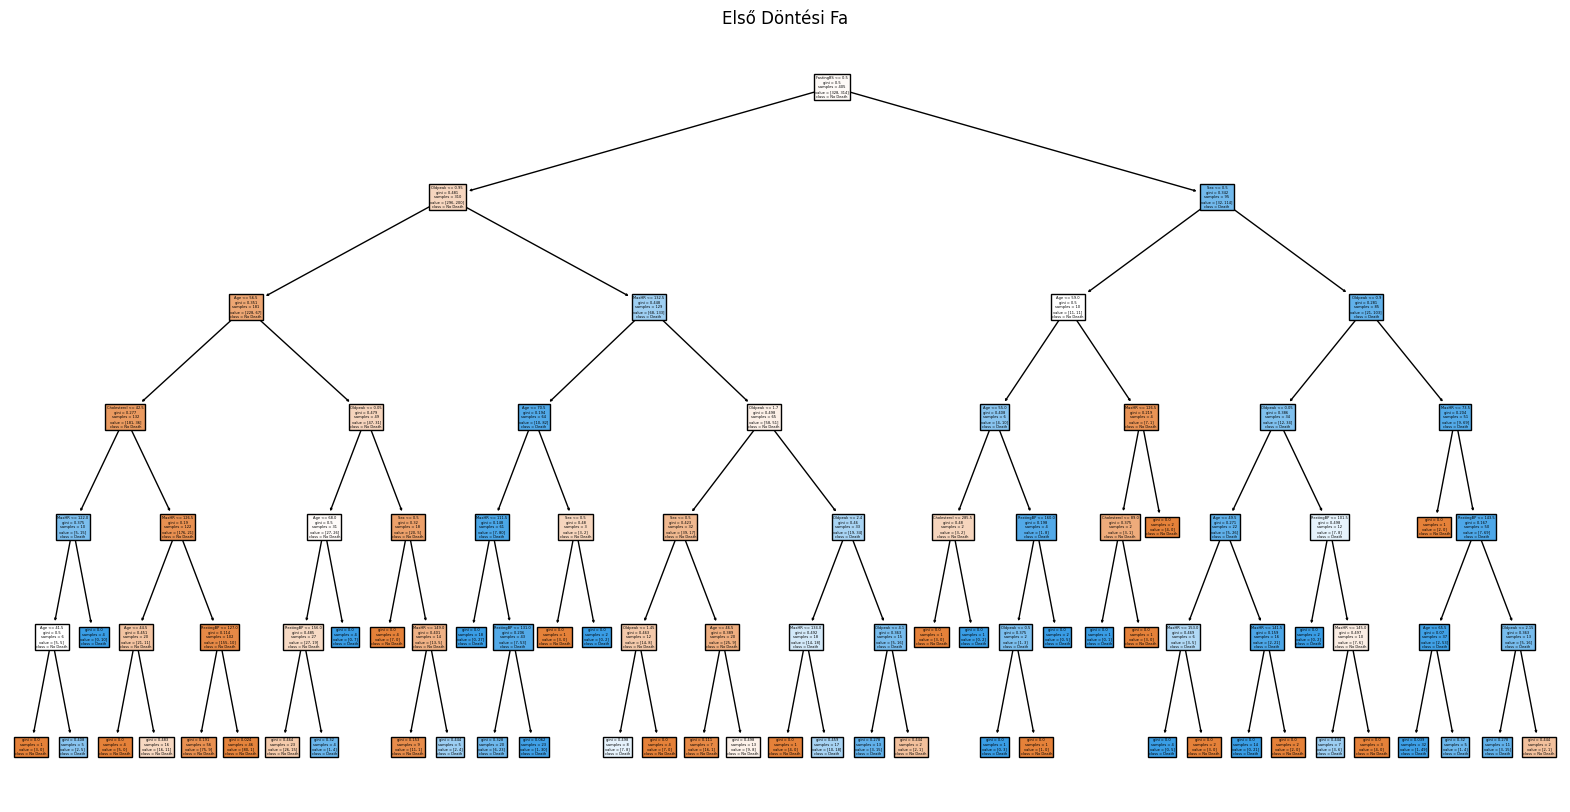

In [62]:
plt.figure(figsize=(20, 10))
plot_tree(random_search.best_estimator_.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['No Death', 'Death'])
plt.title('Első Döntési Fa')
plt.show()